# **Problem Statement**

##Context

In the highly competitive grocery retail industry, understanding customer buying patterns is crucial for enhancing sales, increasing customer satisfaction, and improving profitability. By identifying frequently purchased item combinations, grocery stores can craft effective marketing strategies, optimize inventory management, and tailor promotions to meet customer needs. Leveraging Point of Sale (POS) data can unlock valuable insights that drive customer-centric offerings, such as combo packs, discounts, and targeted promotions, which can increase basket size and improve customer retention. This analysis aligns with business goals by maximizing revenue, reducing operational costs, and boosting customer loyalty.

##Objective

As a business analyst, the goal is to analyze the POS transactional data to identify frequently purchased item combinations. Using association rule mining or similar techniques, the aim is to uncover patterns that will help the store create targeted combo offers and discounts, ultimately driving revenue growth by increasing customer purchases and average basket size.

##Data Description


The dataset consists of transactional data from a grocery store, where each row represents a product purchased in a specific order. The columns in the dataset are as follows:

* Date: The date when the transaction took place.
* Order_id: A unique identifier for each customer order.
* Product: The individual item purchased in the transaction.

# **Importing the necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/dataset_group.csv')
#returns first 5 rows
df.head(5)

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


# **Data Overview**

###1. Structure of Data

In [32]:
df.shape

(20641, 3)

###2. Type of Data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


###3. Missing values treatment

In [34]:
df.isnull().sum()

,0
Date,0
Order_id,0
Product,0


###4. Data Duplicates

In [35]:
df.duplicated().sum()

4730

###5. Preprocessing

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.reset_index(inplace=True, drop=True)

In [38]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
15906,25-02-2020,1138,soda
15907,25-02-2020,1138,paper towels
15908,26-02-2020,1139,soda
15909,26-02-2020,1139,laundry detergent


# **Exploratory Data Analysis**

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [61]:
daily_trends = df.groupby('Date').size()
weekly_trends = df.resample('W', on='Date').size()
monthly_trends = df.resample('M', on='Date').size()
quarterly_trends = df.resample('Q', on='Date').size()
yearly_trends = df.resample('Y', on='Date').size()
# Product Frequency
cleaned_product_counts = df['Product'].value_counts()


sns.set(style="whitegrid")

###1. Top 10 Most Frequently Purchased Products

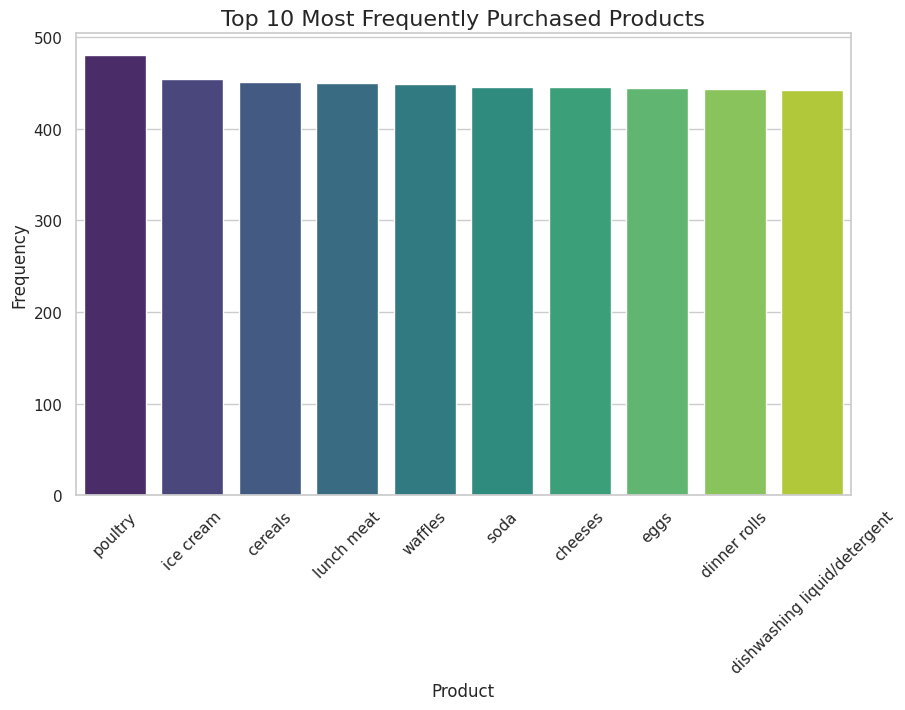

In [62]:
# 1. Top 10 Most Frequently Purchased Products
plt.figure(figsize=(10, 6))
sns.barplot(x=cleaned_product_counts.head(10).index, y=cleaned_product_counts.head(10).values, palette="viridis")
plt.title("Top 10 Most Frequently Purchased Products", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Product", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 2. Daily Transaction Trends

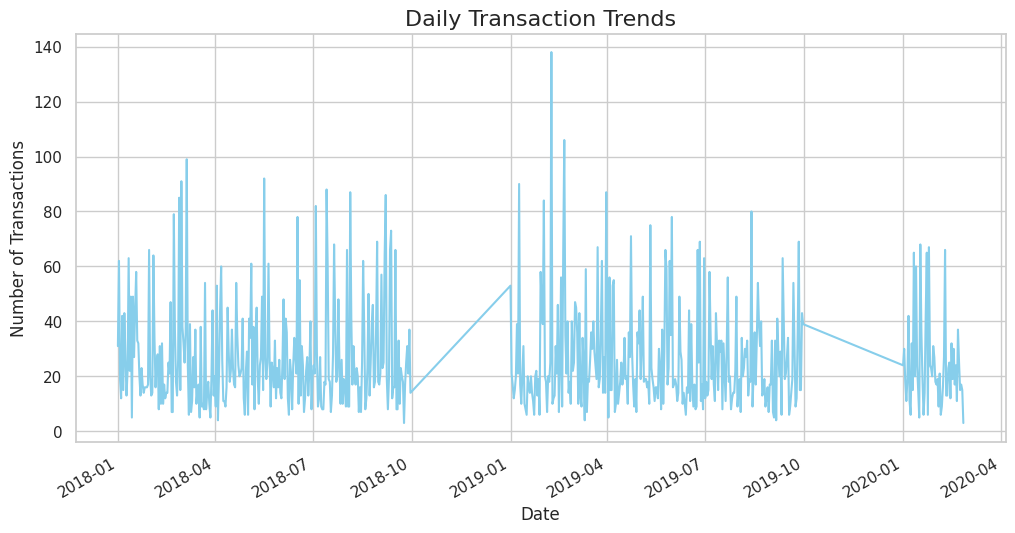

In [63]:

plt.figure(figsize=(12, 6))
daily_trends.plot(color="skyblue")
plt.title("Daily Transaction Trends", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.show()


### 3. Weekly, Monthly, Yearly Transaction Trends

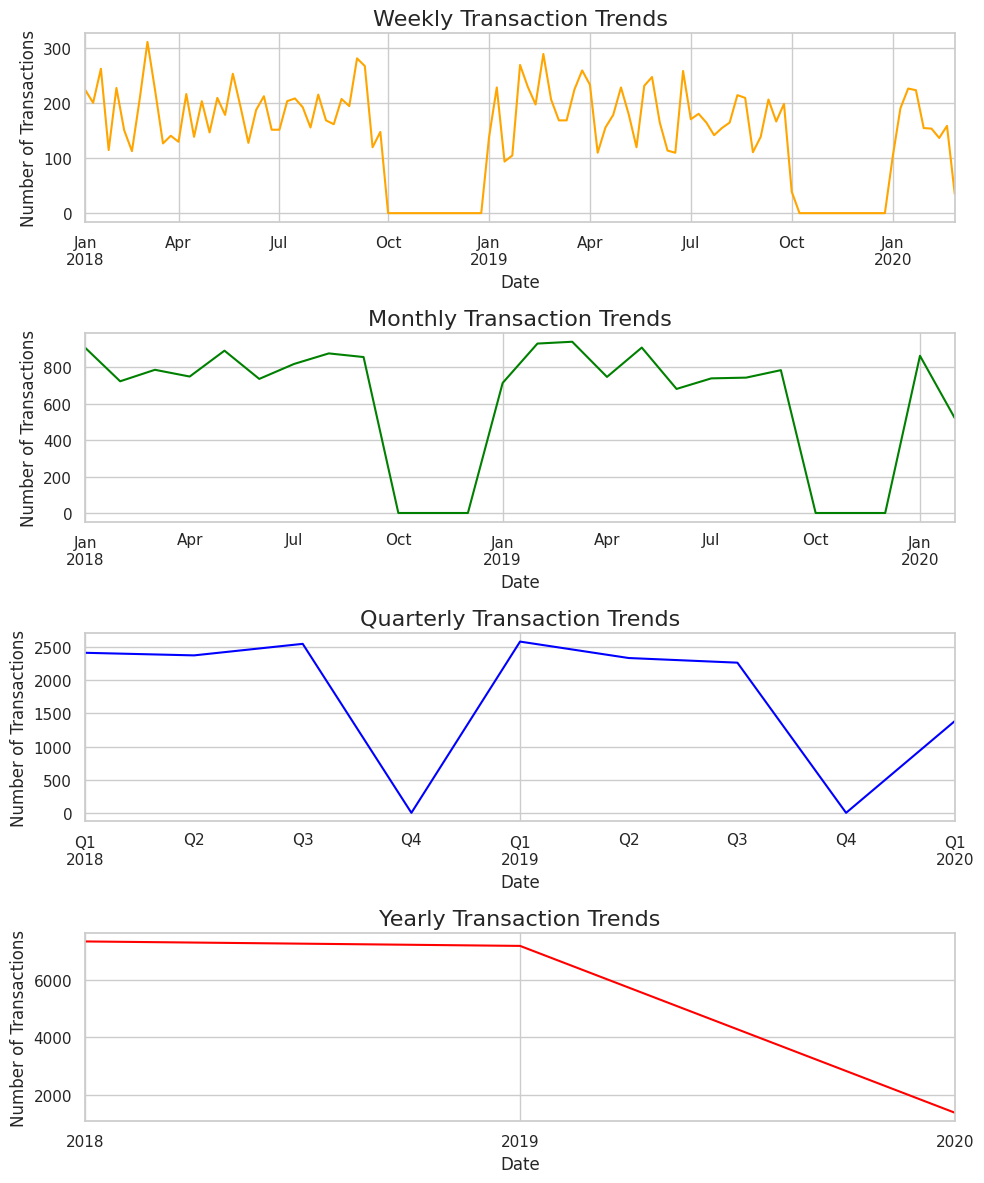

In [66]:
# 3. Weekly, Monthly, Yearly Transaction Trends
fig, axes = plt.subplots(4, 1, figsize=(10, 12))
weekly_trends.plot(ax=axes[0], color="orange")
axes[0].set_title("Weekly Transaction Trends", fontsize=16)
axes[0].set_ylabel("Number of Transactions", fontsize=12)
axes[0].set_xlabel("Date", fontsize=12)

monthly_trends.plot(ax=axes[1], color="green")
axes[1].set_title("Monthly Transaction Trends", fontsize=16)
axes[1].set_ylabel("Number of Transactions", fontsize=12)
axes[1].set_xlabel("Date", fontsize=12)

quarterly_trends.plot(ax=axes[2], color="blue")
axes[2].set_title("Quarterly Transaction Trends", fontsize=16)
axes[2].set_ylabel("Number of Transactions", fontsize=12)
axes[2].set_xlabel("Date", fontsize=12)

yearly_trends.plot(ax=axes[3], color="red")
axes[3].set_title("Yearly Transaction Trends", fontsize=16)
axes[3].set_ylabel("Number of Transactions", fontsize=12)
axes[3].set_xlabel("Date", fontsize=12)

plt.tight_layout()
plt.show()

### 4. Heatmap of Product Sales by Month

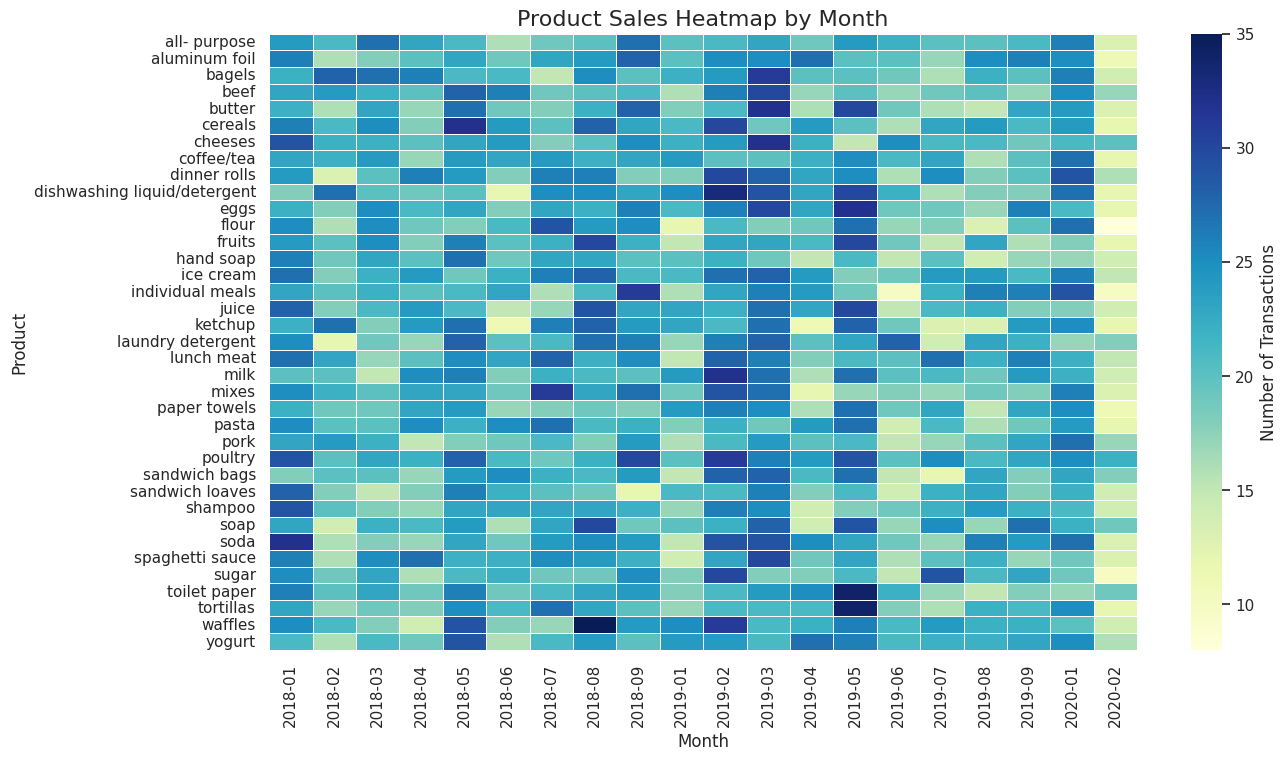

In [59]:

heatmap_data = df.groupby([df['Date'].dt.to_period('M'), 'Product']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap="YlGnBu", cbar_kws={'label': 'Number of Transactions'}, linewidths=0.5)
plt.title("Product Sales Heatmap by Month", fontsize=16)
plt.ylabel("Product", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.show()